"""
Author: Ms. Sharon Veerayah
Project: Random ML Project
"""

## CROSS VALIDATION

#### Dataset

We will use the cancer dataset from the sklearn itself directly

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

### Load the data

In [3]:
from sklearn.datasets import load_diabetes
df = load_diabetes()


### Let us check the keys 

In [4]:
df.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [5]:
#check a column  -- we can see the original repository here.
print(df['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [6]:
df['target']

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

# Get the dataset for analysis


In [7]:
data = pd.DataFrame(df['data'], columns = df['feature_names'] )
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [12]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


# EXPLANATORY DATA ANALYSIS (EDA)

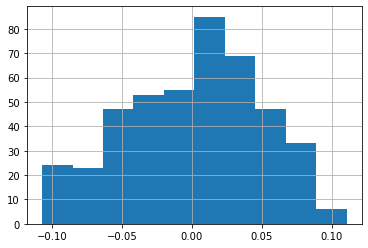

In [10]:
data['age'].hist()

### Training and Test Data

In [14]:
# Train Test Split
from sklearn.model_selection import train_test_split
# To fit the model (training and prediction)
from sklearn.linear_model import LinearRegression
# Get classification report (model evaluation) & CM
from sklearn.metrics import classification_report, confusion_matrix

### Get the  target dataset

In [15]:
target = pd.DataFrame(df['target'])
target.columns = ['target']
target.head()

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    np.ravel(target),
                                                    test_size = 0.20,
                                                    random_state = 51)                                                   


## Training and Prediction

In [18]:
#Set up the model
model = LinearRegression()


In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Split into 5 folds
Kfolds = KFold(n_splits = 5, shuffle=True, random_state=100 )
Scores = cross_val_score(model, X_train, y_train,scoring='r2', cv=Kfolds)
Scores

array([0.54648901, 0.44543659, 0.40702252, 0.54735823, 0.52423432])

In [ ]:
# Another example using -MSE

In [20]:
Scores_CV5 = cross_val_score(model, X_train, y_train, cv=Kfolds, scoring = 'neg_mean_squared_error')
Scores_CV5

array([-2975.81602624, -2984.04881815, -3144.94574891, -3041.28897551,
       -3153.85301924])

In [ ]:
#### TRAINING

In [21]:
model.fit(X_train, y_train)

LinearRegression()

In [22]:
pred = model.predict(X_test)